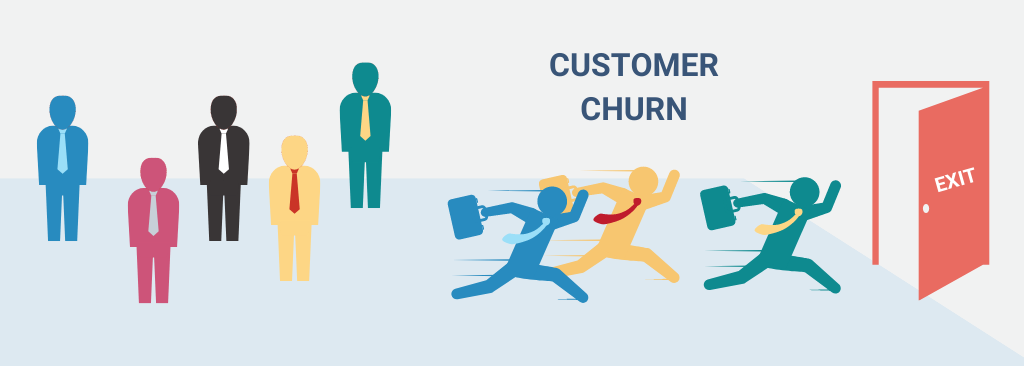

# Banking Customer Churn Analysis & Prediction
## I. Report Abstract
This report will demonstrate the business problem overview of Customer Churning rate in the banking industry. The business problem would be addressed based on advanced business analytic techniques regarding:
- Descriptive Analysis
- Exploratory Data Analysis
- Feature Engineering
- Predictive Modelling (Classification)
- Model Evaluation
- Interpreting the Output
- Strategic Recommendation


## II. Business Problem Overview
The top-tier management of BANK K in Vietnam has noticed that the siginicant decrease in revenue and insufficient ROI of Marketing Campaigns in several channels which are most likely caused by the increase in customer churn rate. Because the bank might fail to remain customer satisfaction or the most of customers have been acquired are campaign enthusiasts who are only interested in the bank for the rewards and promotions from marketing campaigns. 

This project will analyze the root causes of the customer churn also build the predictive model to point out customers who are gonna churn in the future so that the top-tier management could stategically prevent this unfavorable event to happen. 

## III. Dataset Overview 
- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)


Where Exited variable is the target variable, and the rest of the variables are independent variables used for the predictive model.


## IV. Library Import

In [1]:
# !pip install tensorflow
# !pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

## V. Data Modelling

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Comment:
- The real dataset usually contains a significant number of null values in columns. Beside using statistic concepts (Mean, Median, Mode, Max, Min) to fill null value, the business domain knowledge will be remarkably helpful in fill null value as not every null values will be meaningless and fill null value with statistic concepts could affect the distribution of the dataset. However, we do not need to fill null value in this dataset as there is no null values in any columns of the dataset.

In [3]:
# Remove meaning less columns like row. 
df = df.drop(columns = 'RowNumber')

## VI. Exploratory Data Analysis

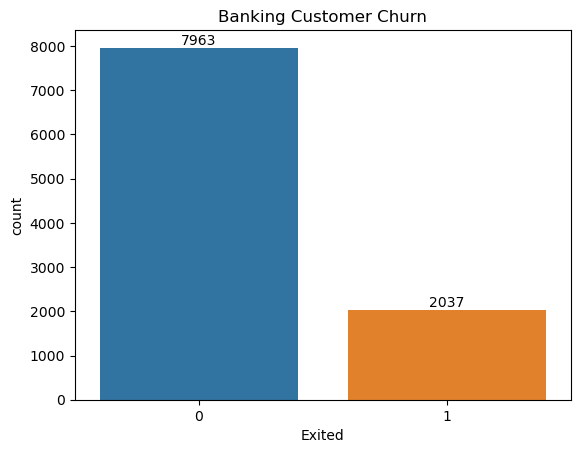

In [4]:
ax = sns.countplot(x='Exited', data = df)
total = df['Exited'].count()

ax.bar_label(ax.containers[0])
plt.title("Banking Customer Churn")
plt.show()

### Comment:
- The churned customer with value Exited = 1 which are 2037 customers accounting for approximately 20% of the total customers of the Bank.

[Text(0, 0, '1302'), Text(0, 0, '735')]

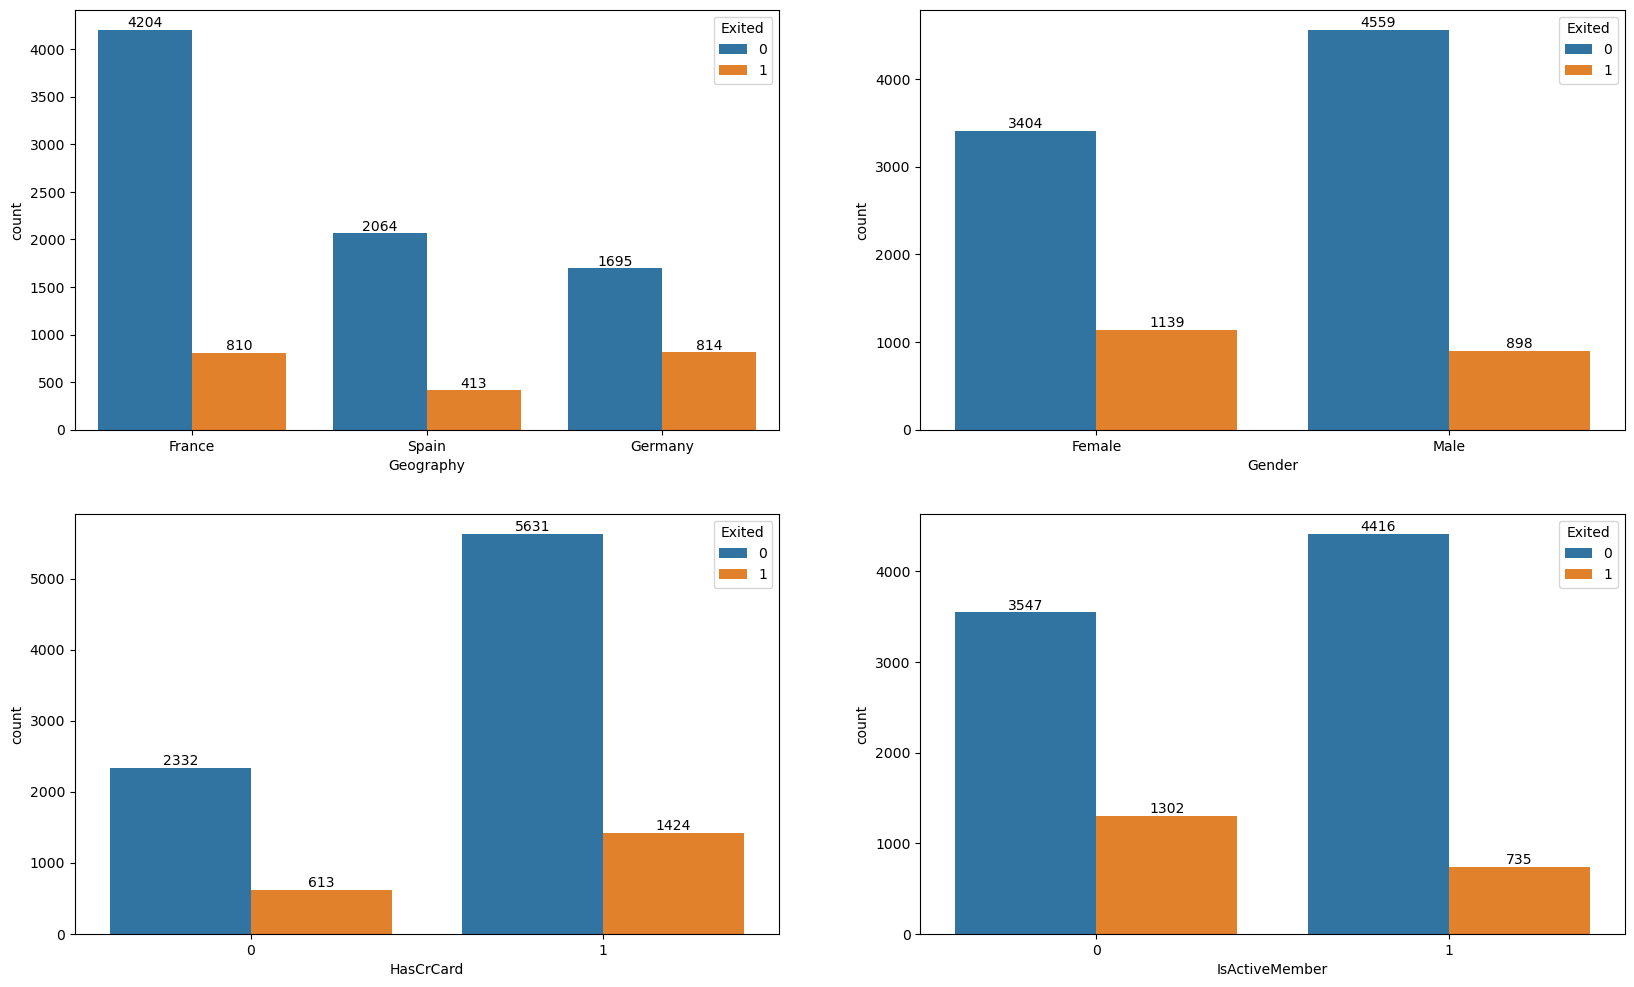

In [5]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
ax2 = sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
ax3 = sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
ax4 = sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

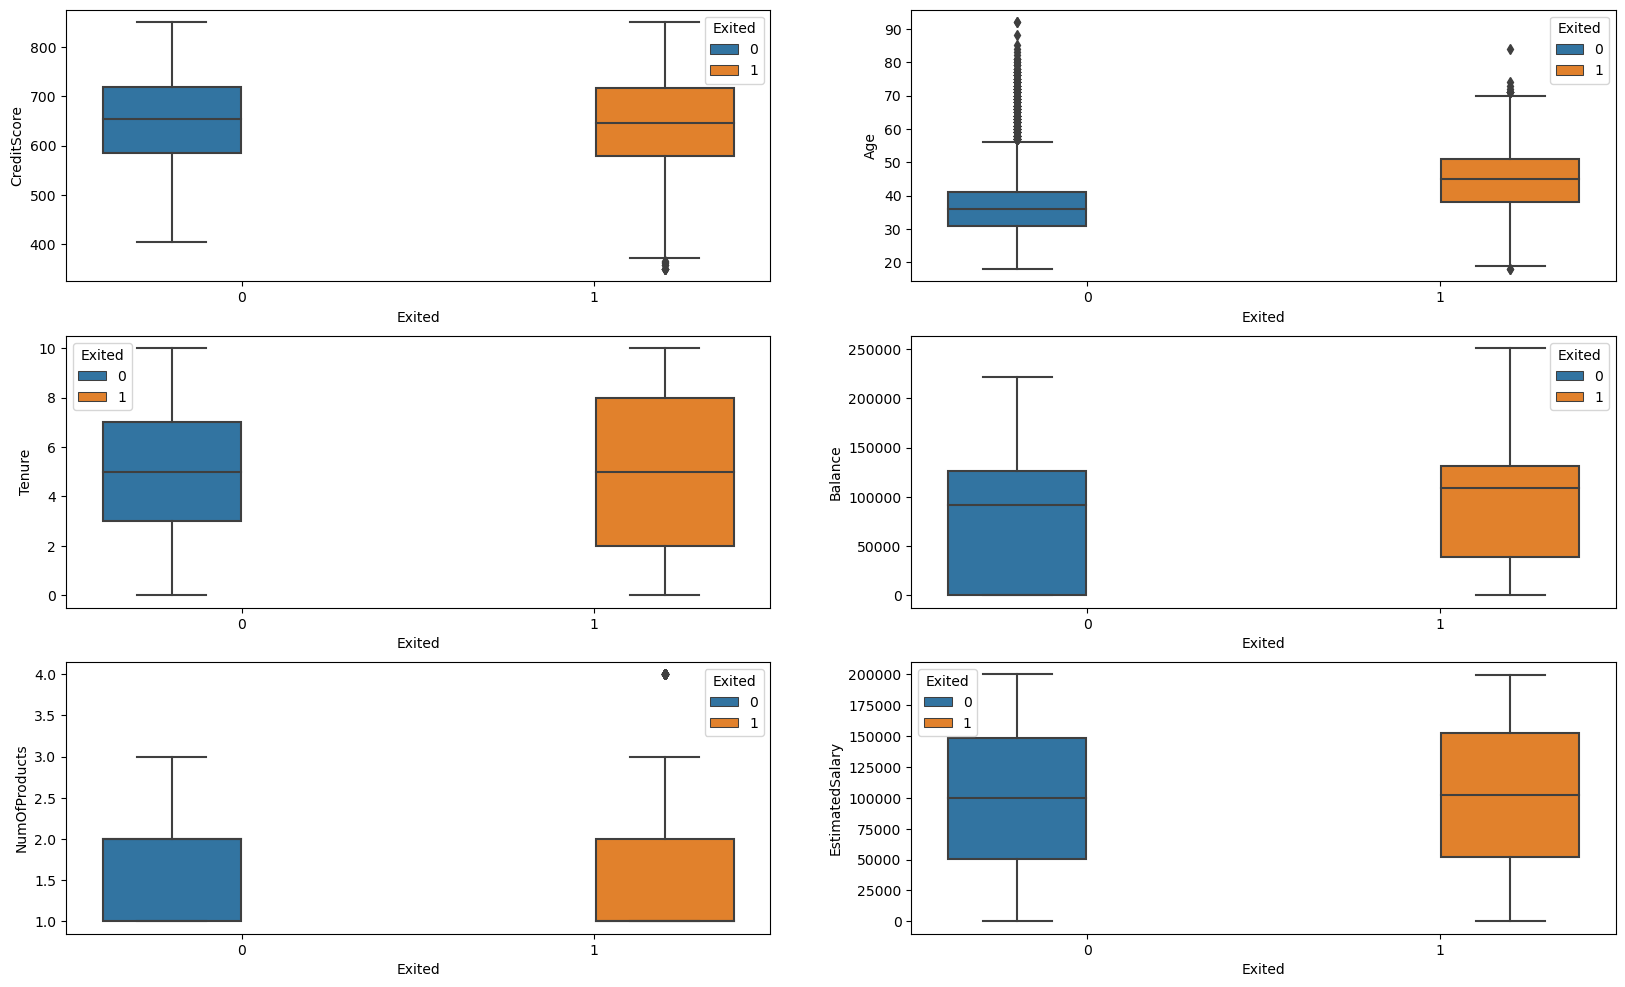

In [6]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### Comment:
- The older customers are more likely to leave the bank as the majority of exited customers are older than current customers.
- The churned customers are generally have higher balance than the current custoemrs which is unfavorable as the bank might lose the sufficient CASA which is low interest capital sources for lending. 
- Both number of products used by customers and the salary of customers have nothing to do with the churn factor.

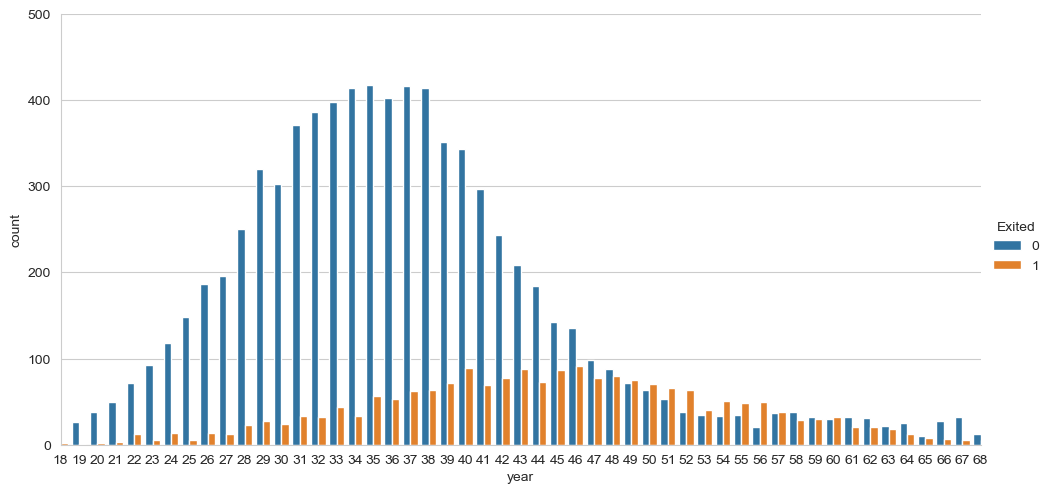

In [7]:
sns.set_style("whitegrid")
g = sns.catplot(x='Age', kind='count',hue='Exited', data=df, aspect=2)#remove hue for age overall distribution
g = g.set_axis_labels("year",'count').set(xlim=(0,50), ylim=(0,500))
plt.show(g)

### Comment:
- Specially, the customers who are 43 years old or more have churned ratio to be more than 50%.

## VII. Feature Engineering & Label Decode
The new independent variables could be created from existing list of variables which might have better insights for the churn in banking. Additionally, the new variables could increase the accuracy of the model as it might be unseen factors contributing to the churn factor. 

Label decode to turn the object datatype to numerical datatype as the machine will learn better with number datatype, and it is better to generally conver object/string datatype to numerical datatype for storage sufficient purposes.

In [8]:
# Feature Engineering
df['Sal_Bal_ratio'] = round(df['EstimatedSalary']/df['Balance'],2) # Salary vs Balance ratio
df['Bal_Sal_ratio'] = round(df['Balance']/df['EstimatedSalary'],2) # Balance vs Salary ratio
df['Bal_vs_Products'] = round(df['Balance']/df['NumOfProducts'],2) # Balance vs number of products
df['Sal_Age'] = round(df['EstimatedSalary']/df['Age'],2)
df['Tenure_Age'] = round(df['Tenure']/df['Age'],2)
df['CreditScr_Age'] = round(df['CreditScore']/df['Age'],2)
df['CreditScr_Sal'] = round(df['CreditScore']/df['EstimatedSalary'],2)

G:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='Exited', ylabel='CreditScr_Sal'>

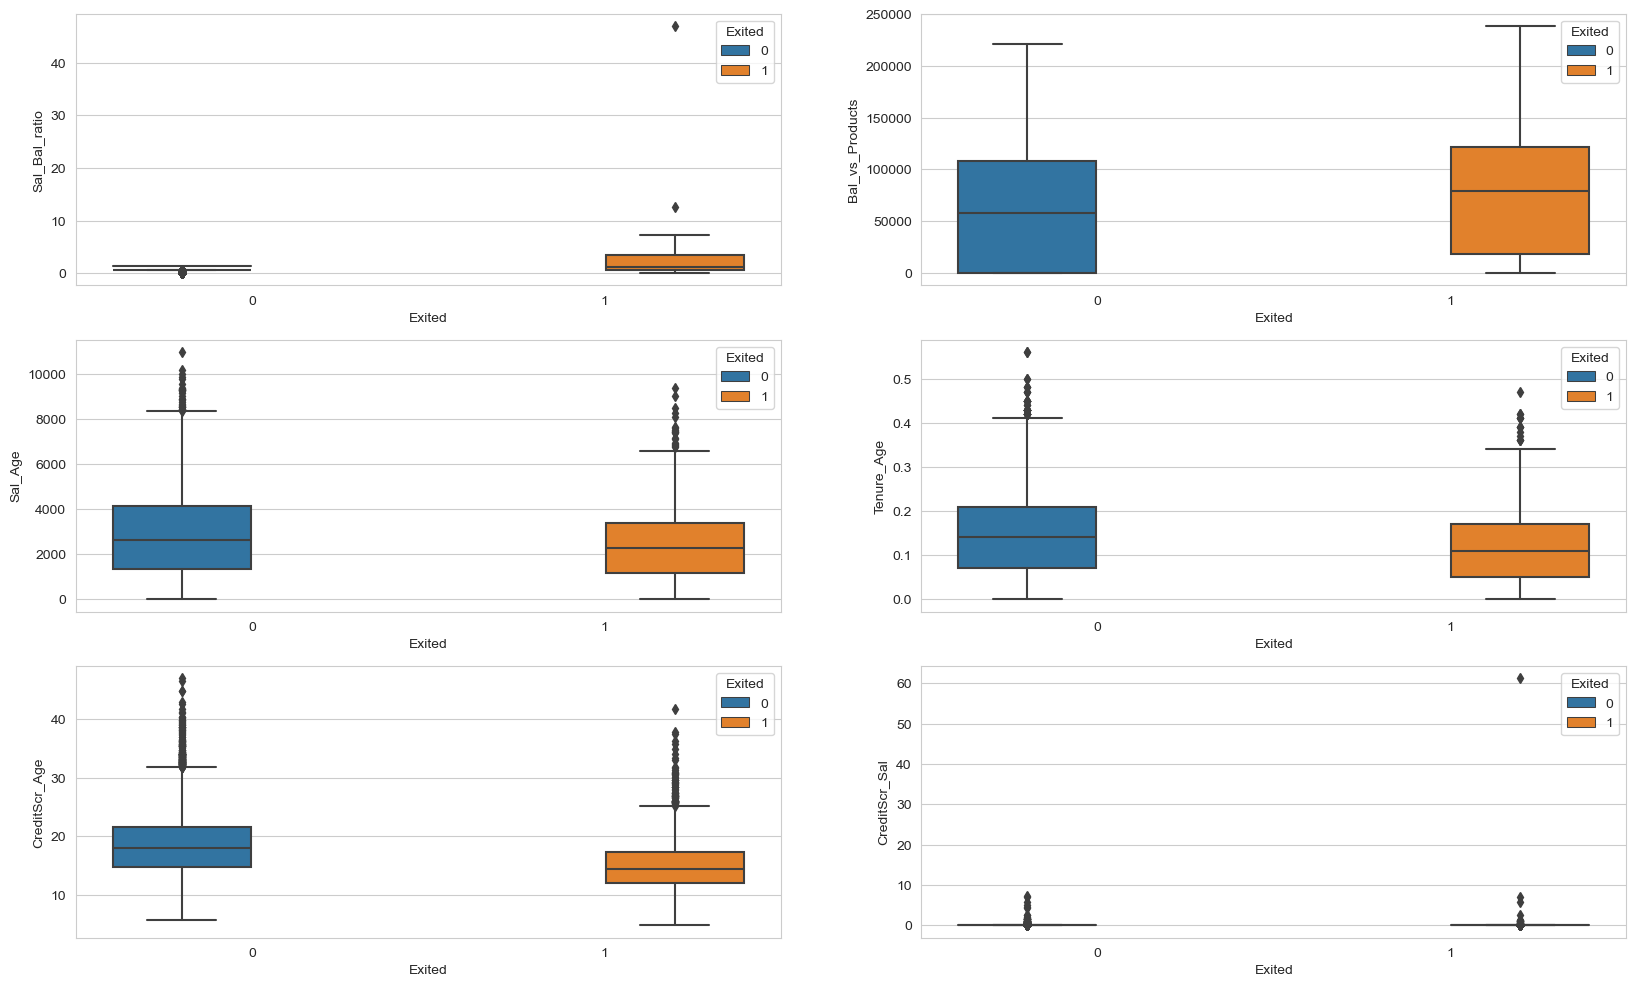

In [9]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Sal_Bal_ratio',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Bal_vs_Products',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Sal_Age',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Tenure_Age',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='CreditScr_Age',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='CreditScr_Sal',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

(-1.0, 5.0)

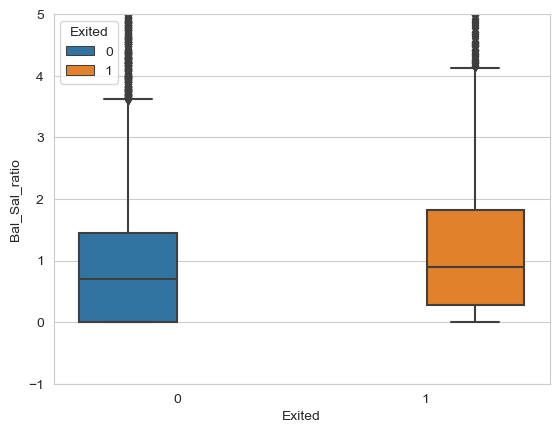

In [10]:
sns.boxplot(y='Bal_Sal_ratio',x ='Exited',hue = 'Exited', data=df)
plt.ylim(-1,5)

In [11]:
#Label Encoder
label_encoder = preprocessing.LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Geography'])
df['Gender_coder'] = label_encoder.fit_transform(df['Gender'])

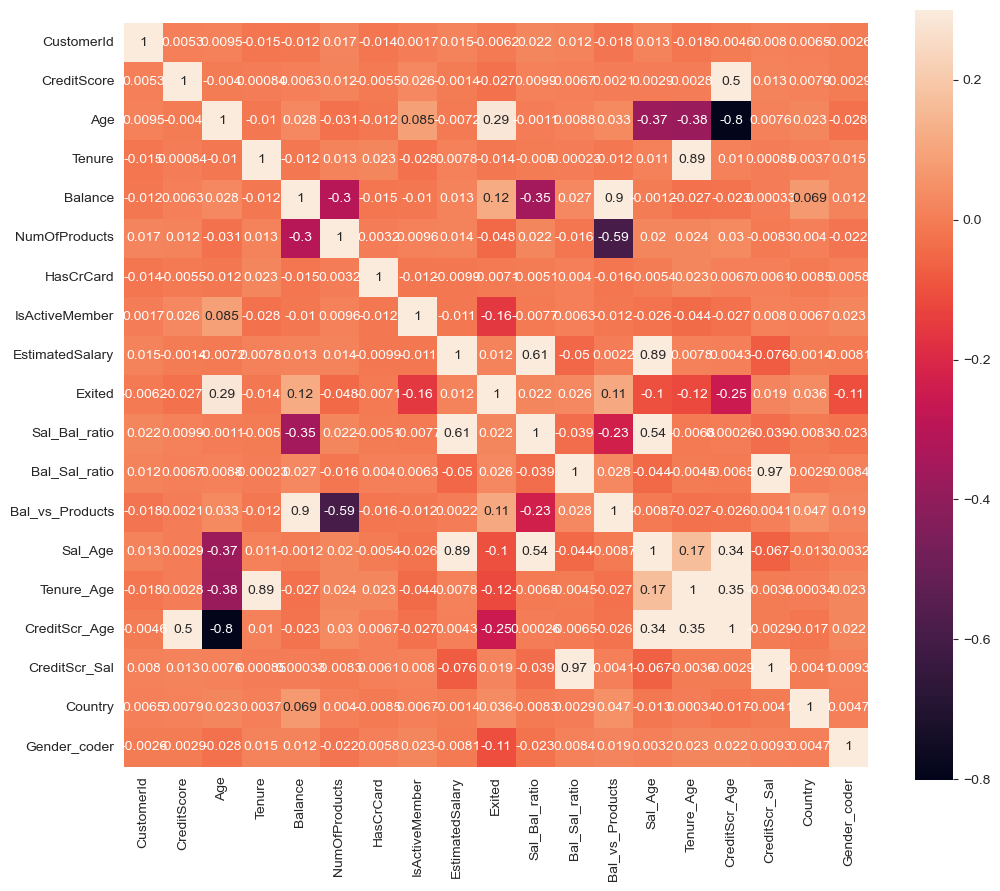

In [12]:
ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df.corr(), vmax=.3, square=True, annot=True)

## VIII. Predictive Modelling

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
 13  Sal_Bal_ratio    10000 non-null  float64
 14  Bal_Sal_ratio    10000 non-null  float64
 15  Bal_vs_Products  10000 non-null  float64
 16  Sal_Age          10000 non-null  float64
 17  Tenure_Age   

In [14]:
# Split tran, test, validate dataset
df_sep = df[['CustomerId', 'Surname', 'Geography', 'Gender']]
Y = df['Exited']
X = df.loc[:, ~df.columns.isin(['CustomerId', 'Surname', 'Geography', 'Gender','Exited','Sal_Bal_ratio'])]

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 42, stratify = Y)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 1, stratify = y_test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify = Y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,stratify = y_train) # 0.25 x 0.8 = 0.2

In [15]:
np.set_printoptions(precision=3, suppress = True) # pretty printing

sc = StandardScaler()

sc.fit(X_train)

# print(dir(sc))
# print(sc.mean_, sc.scale_)


X_train_scaled = sc.transform(X_train)
# print('means:', X_train.mean(axis=0), X_train_scaled.mean(axis=0))
# print('sigmas', X_train.std(axis=0), X_train_scaled.std(axis=0))

X_test_scaled = sc.transform(X_test)
# print('means:', X_test.mean(axis=0), X_test_scaled.mean(axis=0))
# print('sigmas', X_test.std(axis=0), X_test_scaled.std(axis=0))

X_val_scaled = sc.transform(X_val)
# print('means:', X_val.mean(axis=0), X_val_scaled.mean(axis=0))
# print('sigmas', X_val.std(axis=0), X_val_scaled.std(axis=0))

### Logistic Regression

In [16]:
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=100, multi_class='ovr', random_state=1)

In [17]:
y_train_pred=lr.predict(X_train_scaled)

y_pred_test = lr.predict(X_test_scaled)
y_pred_proba_test = lr.predict_proba(X_test_scaled)

y_pred_val = lr.predict(X_val_scaled)
y_pred_proba_val = lr.predict_proba(X_val_scaled)

print('TRAINING')
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred):.3f}')

print('TEST')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred_test):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred_test):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred_test):.3f}')

print('VALIDATE')
print(f'Accuracy: {accuracy_score(y_true=y_val, y_pred=y_pred_val):.3f}')
print(f'Precision: {precision_score(y_true=y_val, y_pred=y_pred_val):.3f}')
print(f'Recall: {recall_score(y_true=y_val, y_pred=y_pred_val):.3f}')
print(f'F1: {f1_score(y_true=y_val, y_pred=y_pred_val):.3f}')

TRAINING
Accuracy: 0.819
Precision: 0.710
Recall: 0.191
F1: 0.301
TEST
Accuracy: 0.822
Precision: 0.752
Recall: 0.187
F1: 0.299
VALIDATE
Accuracy: 0.815
Precision: 0.687
Recall: 0.167
F1: 0.268


### Decision Tree

In [18]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state=1)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [19]:
y_train_pred_tree = tree_model.predict(X_train_scaled)

y_pred_test_tree = tree_model.predict(X_test_scaled)
y_pred_proba_test_tree = tree_model.predict_proba(X_test_scaled)

y_pred_val_tree = tree_model.predict(X_val_scaled)
y_pred_proba_val_tree = tree_model.predict_proba(X_val_scaled)

print('TRAINING')
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred_tree):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred_tree):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred_tree):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred_tree):.3f}')

print('TEST')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test_tree):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred_test_tree):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred_test_tree):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred_test_tree):.3f}')

print('VALIDATE')
print(f'Accuracy: {accuracy_score(y_true=y_val, y_pred=y_pred_val_tree):.3f}')
print(f'Precision: {precision_score(y_true=y_val, y_pred=y_pred_val_tree):.3f}')
print(f'Recall: {recall_score(y_true=y_val, y_pred=y_pred_val_tree):.3f}')
print(f'F1: {f1_score(y_true=y_val, y_pred=y_pred_val_tree):.3f}')

TRAINING
Accuracy: 0.854
Precision: 0.813
Recall: 0.369
F1: 0.508
TEST
Accuracy: 0.848
Precision: 0.801
Recall: 0.337
F1: 0.474
VALIDATE
Accuracy: 0.839
Precision: 0.758
Recall: 0.306
F1: 0.436


### Random Forest

In [20]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)#n_estimators is the number of decision tree
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=25, random_state=1)

In [21]:
y_train_pred_forest = forest.predict(X_train_scaled)

y_pred_test_forest = forest.predict(X_test_scaled)
y_pred_proba_test_forest = forest.predict_proba(X_test_scaled)

y_pred_val_forest = forest.predict(X_val_scaled)
y_pred_proba_val_forest = forest.predict_proba(X_val_scaled)

print('TRAINING')
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred_forest):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred_forest):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred_forest):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred_forest):.3f}')

print('TEST')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test_forest):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred_test_forest):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred_test_forest):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred_test_forest):.3f}')

print('VALIDATE')
print(f'Accuracy: {accuracy_score(y_true=y_val, y_pred=y_pred_val_forest):.3f}')
print(f'Precision: {precision_score(y_true=y_val, y_pred=y_pred_val_forest):.3f}')
print(f'Recall: {recall_score(y_true=y_val, y_pred=y_pred_val_forest):.3f}')
print(f'F1: {f1_score(y_true=y_val, y_pred=y_pred_val_forest):.3f}')

TRAINING
Accuracy: 0.998
Precision: 1.000
Recall: 0.990
F1: 0.995
TEST
Accuracy: 0.862
Precision: 0.765
Recall: 0.464
F1: 0.578
VALIDATE
Accuracy: 0.843
Precision: 0.691
Recall: 0.417
F1: 0.520


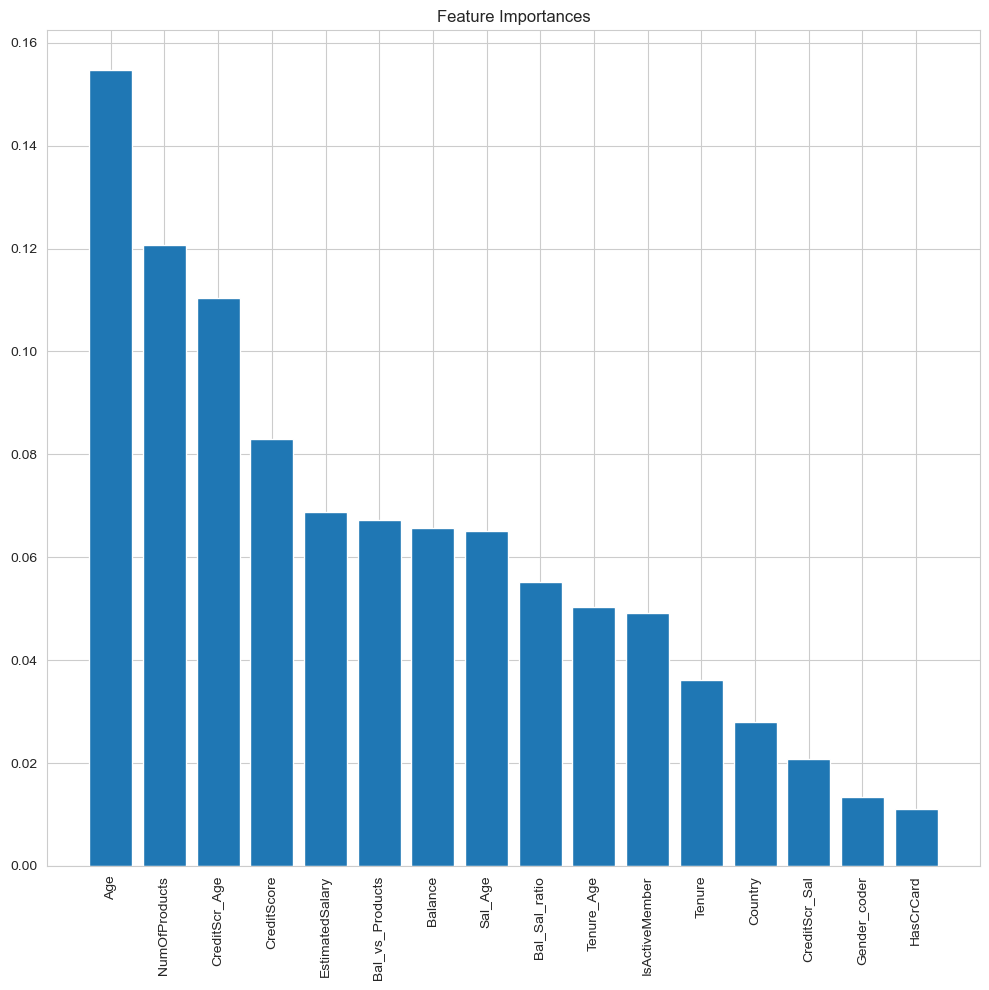

In [72]:
import matplotlib.pyplot as plt
# from itertools import cycle, slice
import matplotlib as mpl

features = X_train.columns
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10,10))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align = 'center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation = 90)
plt.tight_layout()
plt.show()


### XGBoost

In [22]:
XGB = XGBClassifier(base_score=0.5, gamma=0.1)
XGB.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
y_train_pred_XGB = XGB.predict(X_train_scaled)

y_pred_test_XGB = XGB.predict(X_test_scaled)
y_pred_proba_test_XGB = XGB.predict_proba(X_test_scaled)

y_pred_val_XGB = XGB.predict(X_val_scaled)
y_pred_proba_val_XGB = XGB.predict_proba(X_val_scaled)

print('TRAINING')
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred_XGB):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred_XGB):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred_XGB):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred_XGB):.3f}')

print('TEST')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test_XGB):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred_test_XGB):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred_test_XGB):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred_test_XGB):.3f}')

print('VALIDATE')
print(f'Accuracy: {accuracy_score(y_true=y_val, y_pred=y_pred_val_XGB):.3f}')
print(f'Precision: {precision_score(y_true=y_val, y_pred=y_pred_val_XGB):.3f}')
print(f'Recall: {recall_score(y_true=y_val, y_pred=y_pred_val_XGB):.3f}')
print(f'F1: {f1_score(y_true=y_val, y_pred=y_pred_val_XGB):.3f}')

TRAINING
Accuracy: 0.985
Precision: 0.992
Recall: 0.933
F1: 0.962
TEST
Accuracy: 0.849
Precision: 0.703
Recall: 0.447
F1: 0.547
VALIDATE
Accuracy: 0.845
Precision: 0.678
Recall: 0.453
F1: 0.543


### Catboost

In [24]:
clf = CatBoostClassifier(iterations = 500,
                        depth = 10,
                        learning_rate = 0.02,
                        custom_loss = ['Recall'],
                        random_seed = 42)

clf.fit(X_train_scaled, y_train)


0:	learn: 0.6755062	total: 162ms	remaining: 1m 20s
1:	learn: 0.6588433	total: 177ms	remaining: 44s
2:	learn: 0.6432820	total: 191ms	remaining: 31.6s
3:	learn: 0.6289044	total: 204ms	remaining: 25.2s
4:	learn: 0.6136829	total: 216ms	remaining: 21.4s
5:	learn: 0.6018402	total: 217ms	remaining: 17.9s
6:	learn: 0.5883100	total: 230ms	remaining: 16.2s
7:	learn: 0.5756415	total: 242ms	remaining: 14.9s
8:	learn: 0.5633399	total: 255ms	remaining: 13.9s
9:	learn: 0.5525645	total: 267ms	remaining: 13.1s
10:	learn: 0.5417788	total: 274ms	remaining: 12.2s
11:	learn: 0.5338593	total: 276ms	remaining: 11.2s
12:	learn: 0.5234553	total: 289ms	remaining: 10.8s
13:	learn: 0.5133477	total: 301ms	remaining: 10.4s
14:	learn: 0.5067227	total: 303ms	remaining: 9.8s
15:	learn: 0.4981296	total: 316ms	remaining: 9.54s
16:	learn: 0.4901747	total: 328ms	remaining: 9.3s
17:	learn: 0.4820466	total: 340ms	remaining: 9.12s
18:	learn: 0.4751752	total: 353ms	remaining: 8.93s
19:	learn: 0.4684806	total: 365ms	remaining:

175:	learn: 0.2538573	total: 2.29s	remaining: 4.21s
176:	learn: 0.2534750	total: 2.3s	remaining: 4.19s
177:	learn: 0.2528158	total: 2.31s	remaining: 4.18s
178:	learn: 0.2525681	total: 2.32s	remaining: 4.17s
179:	learn: 0.2520656	total: 2.34s	remaining: 4.15s
180:	learn: 0.2516435	total: 2.35s	remaining: 4.14s
181:	learn: 0.2512782	total: 2.36s	remaining: 4.12s
182:	learn: 0.2506938	total: 2.37s	remaining: 4.11s
183:	learn: 0.2505098	total: 2.38s	remaining: 4.09s
184:	learn: 0.2499229	total: 2.4s	remaining: 4.08s
185:	learn: 0.2496029	total: 2.41s	remaining: 4.07s
186:	learn: 0.2494270	total: 2.42s	remaining: 4.05s
187:	learn: 0.2488805	total: 2.44s	remaining: 4.04s
188:	learn: 0.2483817	total: 2.45s	remaining: 4.03s
189:	learn: 0.2481400	total: 2.46s	remaining: 4.01s
190:	learn: 0.2477156	total: 2.47s	remaining: 4s
191:	learn: 0.2474986	total: 2.48s	remaining: 3.99s
192:	learn: 0.2473015	total: 2.5s	remaining: 3.97s
193:	learn: 0.2467225	total: 2.51s	remaining: 3.96s
194:	learn: 0.2461

344:	learn: 0.1946699	total: 4.41s	remaining: 1.98s
345:	learn: 0.1942697	total: 4.42s	remaining: 1.97s
346:	learn: 0.1939453	total: 4.43s	remaining: 1.96s
347:	learn: 0.1936319	total: 4.45s	remaining: 1.94s
348:	learn: 0.1934329	total: 4.46s	remaining: 1.93s
349:	learn: 0.1932309	total: 4.47s	remaining: 1.92s
350:	learn: 0.1930853	total: 4.48s	remaining: 1.9s
351:	learn: 0.1927282	total: 4.5s	remaining: 1.89s
352:	learn: 0.1923252	total: 4.51s	remaining: 1.88s
353:	learn: 0.1919940	total: 4.52s	remaining: 1.87s
354:	learn: 0.1916516	total: 4.54s	remaining: 1.85s
355:	learn: 0.1913862	total: 4.55s	remaining: 1.84s
356:	learn: 0.1910297	total: 4.56s	remaining: 1.83s
357:	learn: 0.1906604	total: 4.57s	remaining: 1.81s
358:	learn: 0.1903481	total: 4.58s	remaining: 1.8s
359:	learn: 0.1899503	total: 4.6s	remaining: 1.79s
360:	learn: 0.1897413	total: 4.61s	remaining: 1.77s
361:	learn: 0.1894523	total: 4.62s	remaining: 1.76s
362:	learn: 0.1894084	total: 4.63s	remaining: 1.75s
363:	learn: 0.18

In [25]:
y_train_pred_clf = clf.predict(X_train_scaled)

y_pred_test_clf = clf.predict(X_test_scaled)
y_pred_proba_test_clf = clf.predict_proba(X_test_scaled)

y_pred_val_clf = clf.predict(X_val_scaled)
y_pred_proba_val_clf = clf.predict_proba(X_val_scaled)

print('TRAINING')
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred_clf):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred_clf):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred_clf):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred_clf):.3f}')

print('TEST')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test_clf):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred_test_clf):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred_test_clf):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred_test_clf):.3f}')

print('VALIDATE')
print(f'Accuracy: {accuracy_score(y_true=y_val, y_pred=y_pred_val_clf):.3f}')
print(f'Precision: {precision_score(y_true=y_val, y_pred=y_pred_val_clf):.3f}')
print(f'Recall: {recall_score(y_true=y_val, y_pred=y_pred_val_clf):.3f}')
print(f'F1: {f1_score(y_true=y_val, y_pred=y_pred_val_clf):.3f}')

TRAINING
Accuracy: 0.949
Precision: 0.976
Recall: 0.769
F1: 0.860
TEST
Accuracy: 0.864
Precision: 0.782
Recall: 0.457
F1: 0.577
VALIDATE
Accuracy: 0.855
Precision: 0.722
Recall: 0.471
F1: 0.570


### ANN

In [26]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Recall'])

ann.fit(X_train_scaled, y_train, batch_size = 32, epochs = 50)


Epoch 1/50
188/188 [==============================] - 1s 812us/step - loss: 0.4743 - accuracy: 0.7872 - recall: 0.1522
Epoch 2/50
188/188 [==============================] - 0s 730us/step - loss: 0.4083 - accuracy: 0.8355 - recall: 0.3069
Epoch 3/50
188/188 [==============================] - 0s 729us/step - loss: 0.3789 - accuracy: 0.8472 - recall: 0.3715
Epoch 4/50
188/188 [==============================] - 0s 755us/step - loss: 0.3587 - accuracy: 0.8555 - recall: 0.4206
Epoch 5/50
188/188 [==============================] - 0s 743us/step - loss: 0.3474 - accuracy: 0.8573 - recall: 0.4313
Epoch 6/50
188/188 [==============================] - 0s 731us/step - loss: 0.3400 - accuracy: 0.8602 - recall: 0.4394
Epoch 7/50
188/188 [==============================] - 0s 772us/step - loss: 0.3357 - accuracy: 0.8612 - recall: 0.4574
Epoch 8/50
188/188 [==============================] - 0s 773us/step - loss: 0.3320 - accuracy: 0.8607 - recall: 0.4501
Epoch 9/50
188/188 [============================

In [27]:
y_train_pred_ann = ann.predict(X_train_scaled)
y_train_pred_ann = y_train_pred_ann > 0.5
y_pred_test_ann = ann.predict(X_test_scaled)
y_pred_test_ann = y_pred_test_ann > 0.5

y_pred_val_ann = ann.predict(X_val_scaled)
y_pred_val_ann = y_pred_val_ann > 0.5


print('TRAINING')
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred_ann):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred_ann):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred_ann):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred_ann):.3f}')

print('TEST')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test_ann):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred_test_ann):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred_test_ann):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred_test_ann):.3f}')

print('VALIDATE')
print(f'Accuracy: {accuracy_score(y_true=y_val, y_pred=y_pred_val_ann):.3f}')
print(f'Precision: {precision_score(y_true=y_val, y_pred=y_pred_val_ann):.3f}')
print(f'Recall: {recall_score(y_true=y_val, y_pred=y_pred_val_ann):.3f}')
print(f'F1: {f1_score(y_true=y_val, y_pred=y_pred_val_ann):.3f}')

63/63 [==============================] - 0s 525us/step
TRAINING
Accuracy: 0.897
Precision: 0.805
Recall: 0.655
F1: 0.723
TEST
Accuracy: 0.835
Precision: 0.627
Recall: 0.462
F1: 0.532
VALIDATE
Accuracy: 0.839
Precision: 0.629
Recall: 0.507
F1: 0.562


## IX. Model Evaluation

188/188 [==============================] - 0s 554us/step


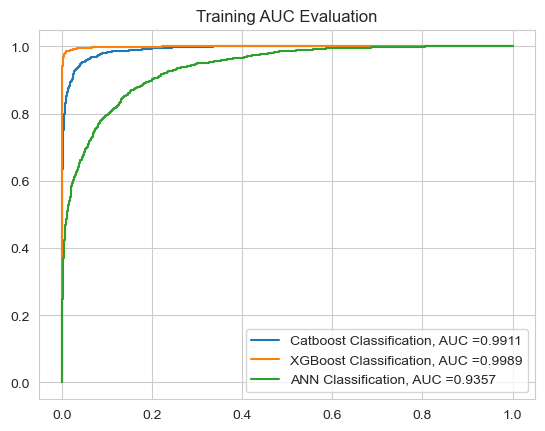

In [28]:
from sklearn import metrics

y_pred1 = clf.predict_proba(X_train_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred1)
auc = round(metrics.roc_auc_score(y_train, y_pred1),4) 
plt.plot(fpr, tpr, label = "Catboost Classification, AUC ="+str(auc))

y_pred4 = XGB.predict_proba(X_train_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred4)
auc = round(metrics.roc_auc_score(y_train, y_pred4),4) 
plt.plot(fpr, tpr, label = "XGBoost Classification, AUC ="+str(auc))

y_pred6 = ann.predict(X_train_scaled)#[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred6)
auc = round(metrics.roc_auc_score(y_train, y_pred6),4) 
plt.plot(fpr, tpr, label = "ANN Classification, AUC ="+str(auc))

plt.legend()
plt.title('Training AUC Evaluation')
plt.show()

63/63 [==============================] - 0s 503us/step


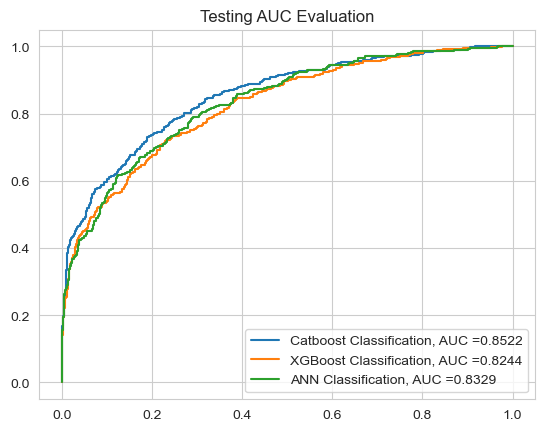

In [29]:
from sklearn import metrics

y_pred1 = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1)
auc = round(metrics.roc_auc_score(y_test, y_pred1),4) 
plt.plot(fpr, tpr, label = "Catboost Classification, AUC ="+str(auc))

y_pred4 = XGB.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred4)
auc = round(metrics.roc_auc_score(y_test, y_pred4),4) 
plt.plot(fpr, tpr, label = "XGBoost Classification, AUC ="+str(auc))

y_pred6 = ann.predict(X_test_scaled)#[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred6)
auc = round(metrics.roc_auc_score(y_test, y_pred6),4) 
plt.plot(fpr, tpr, label = "ANN Classification, AUC ="+str(auc))

plt.legend()
plt.title('Testing AUC Evaluation')
plt.show()

63/63 [==============================] - 0s 514us/step


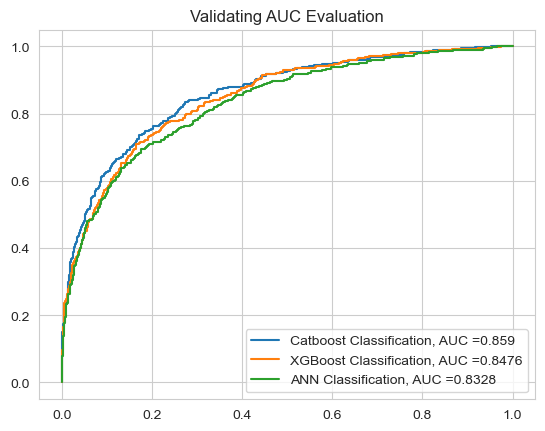

In [30]:
from sklearn import metrics

y_pred1 = clf.predict_proba(X_val_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, y_pred1)
auc = round(metrics.roc_auc_score(y_val, y_pred1),4) 
plt.plot(fpr, tpr, label = "Catboost Classification, AUC ="+str(auc))

y_pred4 = XGB.predict_proba(X_val_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, y_pred4)
auc = round(metrics.roc_auc_score(y_val, y_pred4),4) 
plt.plot(fpr, tpr, label = "XGBoost Classification, AUC ="+str(auc))

y_pred6 = ann.predict(X_val_scaled)#[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, y_pred6)
auc = round(metrics.roc_auc_score(y_val, y_pred6),4) 
plt.plot(fpr, tpr, label = "ANN Classification, AUC ="+str(auc))

plt.legend()
plt.title('Validating AUC Evaluation')
plt.show()

#### Comment:
- The AUC from scale 0 to 1 indicating the larger the AUC the better distinction between classification value of the model.

### Confusion Matrix

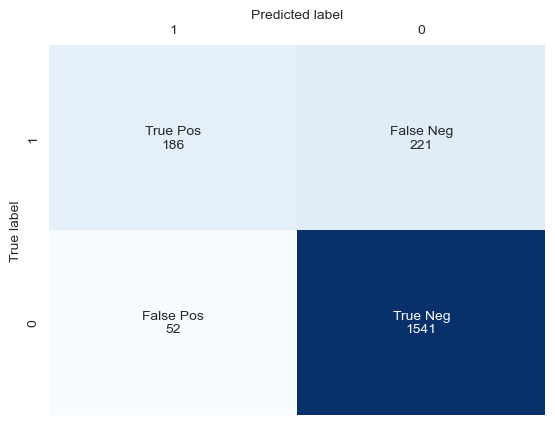

In [31]:

labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred_test_clf, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']

labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

#### Comment: 
- The confusion matrix argue that better accuracy sometimes does not mean the model is great, as we can see that the model only correctly predict 189 churned customers meaning we have missed 221 customers.

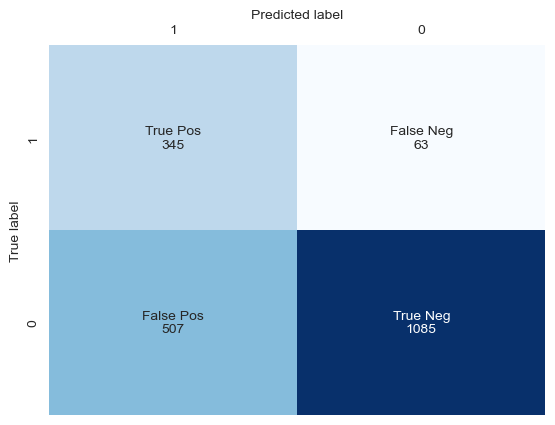

In [48]:
y_pred_test_clf2 = clf.predict_proba(X_val_scaled)[:,1]
y_pred_test_clf2 = y_pred_test_clf2  > 0.1

labels = [1,0]
confmat2 = confusion_matrix(y_true=y_val, y_pred=y_pred_test_clf2, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']

labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

#### Comment:
- After changing the proba from > 0.5 to > 0.1, the model can successfully predict 345 churned customers. Better matrix but lower accuracy.
- The CatboostClassification Algorithm could be used to predict the churned customer in the future as it has the most stabability among the top 3 best performance algorithms including XGBoostClassification and ANN.
- The feature selection was used via feature importance of tree base classification. However, it is slightly increase the accuracy.